Census Data Exploration: Malibu Race Data


In [15]:
import pandas as pd
# for general data wrangling tasks

In [16]:
import geopandas as gpd
# to read and visualize spatial data


In [18]:
import contextily as ctx
# to provide basemaps 


In [19]:
import matplotlib.pyplot as plt
# to give more power to your figures (plots)


In [212]:
malibu = gpd.read_file('data/acs2019_5yr_B03002_14000US06037800506.geojson')
#loading geojson file

In [214]:
malibu.head()
#what first five rows of data looks like

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,14000US06037800406,"Census Tract 8004.06, Los Angeles, CA",2529.0,302.0,2174.0,293.0,1766.0,257.0,95.0,73.0,...,12.0,113.0,85.0,8.0,12.0,6.0,10.0,2.0,4.0,"MULTIPOLYGON (((-118.94508 34.04382, -118.9449..."
1,14000US06037800408,"Census Tract 8004.08, Los Angeles, CA",7274.0,451.0,6438.0,511.0,6017.0,491.0,21.0,35.0,...,17.0,25.0,34.0,23.0,38.0,0.0,17.0,23.0,38.0,"MULTIPOLYGON (((-118.84991 34.04568, -118.8463..."
2,14000US06037800410,"Census Tract 8004.10, Los Angeles, CA",4031.0,341.0,3423.0,316.0,2411.0,263.0,177.0,63.0,...,12.0,67.0,37.0,53.0,37.0,11.0,19.0,42.0,33.0,"MULTIPOLYGON (((-118.79213 34.07498, -118.7919..."
3,14000US06037800504,"Census Tract 8005.04, Los Angeles, CA",2334.0,356.0,2240.0,365.0,2004.0,378.0,60.0,71.0,...,12.0,14.0,21.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.71425 34.03070, -118.7141..."
4,14000US06037800506,"Census Tract 8005.06, Los Angeles, CA",3270.0,402.0,3089.0,402.0,2670.0,392.0,47.0,63.0,...,12.0,5.0,11.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.65342 34.07002, -118.6531..."


<AxesSubplot:>

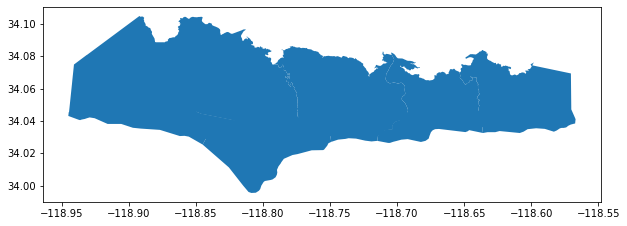

In [213]:
malibu.plot(figsize=(10,10))
#plot data

In [215]:
malibu.info()
# look at the data types


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             6 non-null      object  
 1   name              6 non-null      object  
 2   B03002001         6 non-null      float64 
 3   B03002001, Error  6 non-null      float64 
 4   B03002002         6 non-null      float64 
 5   B03002002, Error  6 non-null      float64 
 6   B03002003         6 non-null      float64 
 7   B03002003, Error  6 non-null      float64 
 8   B03002004         6 non-null      float64 
 9   B03002004, Error  6 non-null      float64 
 10  B03002005         6 non-null      float64 
 11  B03002005, Error  6 non-null      float64 
 12  B03002006         6 non-null      float64 
 13  B03002006, Error  6 non-null      float64 
 14  B03002007         6 non-null      float64 
 15  B03002007, Error  6 non-null      float64 
 16  B03002008         6 no

In [216]:
list(malibu)

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

In [217]:
columns_to_keep = ['geoid',
 'name','B03002001','B03002002','B03002003','B03002004','B03002005','B03002006','B03002007','B03002008','B03002009','B03002012','geometry']

In [218]:
columns_to_keep
# columns to keep

['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [219]:
malibu = malibu[columns_to_keep]
# redefine gdf with only columns to keep

In [220]:
malibu.shape
#rows, columns

(6, 13)

In [221]:
malibu.columns = ['geoid', 'name','Total','Not Hispanic or Latino','White Alone','Black or African American Alone',
                  'American Indian and Alaska Native Alone', 'Asian alone','Native Hawaiian and Other Pacific Islander Alone',
                  'Some Other Race Alone,','Two or more races', 'Hispanic or Latino','geometry' ]

#new column names 

In [222]:
malibu.head()
#check to see new column names 

,geoid,name,Total,Not Hispanic or Latino,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian alone,Native Hawaiian and Other Pacific Islander Alone,"Some Other Race Alone,",Two or more races,Hispanic or Latino,geometry
0,14000US06037800406,"Census Tract 8004.06, Los Angeles, CA",2529.0,2174.0,1766.0,95.0,15.0,88.0,0.0,0.0,210.0,355.0,"MULTIPOLYGON (((-118.94508 34.04382, -118.9449..."
1,14000US06037800408,"Census Tract 8004.08, Los Angeles, CA",7274.0,6438.0,6017.0,21.0,0.0,78.0,0.0,0.0,322.0,836.0,"MULTIPOLYGON (((-118.84991 34.04568, -118.8463..."
2,14000US06037800410,"Census Tract 8004.10, Los Angeles, CA",4031.0,3423.0,2411.0,177.0,23.0,591.0,9.0,0.0,212.0,608.0,"MULTIPOLYGON (((-118.79213 34.07498, -118.7919..."
3,14000US06037800504,"Census Tract 8005.04, Los Angeles, CA",2334.0,2240.0,2004.0,60.0,0.0,106.0,27.0,0.0,43.0,94.0,"MULTIPOLYGON (((-118.71425 34.03070, -118.7141..."
4,14000US06037800506,"Census Tract 8005.06, Los Angeles, CA",3270.0,3089.0,2670.0,47.0,0.0,243.0,0.0,0.0,129.0,181.0,"MULTIPOLYGON (((-118.65342 34.07002, -118.6531..."


In [223]:
malibu['Total'].head()
# access a single column like df['col_name']

0    2529.0
1    7274.0
2    4031.0
3    2334.0
4    3270.0
Name: Total, dtype: float64

In [224]:
malibu['Total'].describe()
# get some stats

count        6.000000
mean      5343.000000
std       3991.862723
min       2334.000000
25%       2714.250000
50%       3650.500000
75%       6463.250000
max      12620.000000
Name: Total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

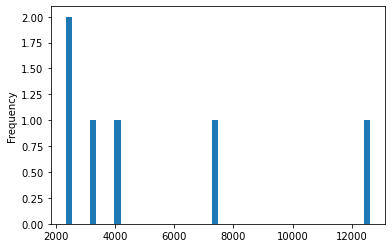

In [225]:
malibu['Total'].plot.hist(bins=50)
#plotting a histogram

In [226]:
malibu['Percent Not Hispanic or Latino'] = malibu['Not Hispanic or Latino']/malibu['Total']*100 
malibu['Percent White Alone'] = malibu['White Alone']/malibu['Total']*100
malibu['Percent Black or African American Alone'] = malibu['Black or African American Alone']/malibu['Total']*100
malibu['Percent American Indian and Alaska Native Alone'] = malibu['American Indian and Alaska Native Alone']/malibu['Total']*100
malibu['Percent Asian alone'] = malibu['Asian alone']/malibu['Total']*100
malibu['Percent Native Hawaiian and Other Pacific Islander Alone'] = malibu['Native Hawaiian and Other Pacific Islander Alone']/malibu['Total']*100
malibu['Percent Some Other Race Alone,'] = malibu['Some Other Race Alone,']/malibu['Total']*100
malibu['Percent Two or more races'] = malibu['Two or more races']/malibu['Total']*100
malibu['Percent Hispanic or Latino'] = malibu['Hispanic or Latino']/malibu['Total']*100
#adding new percentage column for each variable 

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [227]:
malibu.head()

,geoid,name,Total,Not Hispanic or Latino,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian alone,Native Hawaiian and Other Pacific Islander Alone,"Some Other Race Alone,",...,geometry,Percent Not Hispanic or Latino,Percent White Alone,Percent Black or African American Alone,Percent American Indian and Alaska Native Alone,Percent Asian alone,Percent Native Hawaiian and Other Pacific Islander Alone,"Percent Some Other Race Alone,",Percent Two or more races,Percent Hispanic or Latino
0,14000US06037800406,"Census Tract 8004.06, Los Angeles, CA",2529.0,2174.0,1766.0,95.0,15.0,88.0,0.0,0.0,...,"MULTIPOLYGON (((-118.94508 34.04382, -118.9449...",85.962831,69.829972,3.756425,0.593120,3.479636,0.000000,0.0,8.303677,14.037169
1,14000US06037800408,"Census Tract 8004.08, Los Angeles, CA",7274.0,6438.0,6017.0,21.0,0.0,78.0,0.0,0.0,...,"MULTIPOLYGON (((-118.84991 34.04568, -118.8463...",88.507011,82.719274,0.288699,0.000000,1.072312,0.000000,0.0,4.426725,11.492989
2,14000US06037800410,"Census Tract 8004.10, Los Angeles, CA",4031.0,3423.0,2411.0,177.0,23.0,591.0,9.0,0.0,...,"MULTIPOLYGON (((-118.79213 34.07498, -118.7919...",84.916894,59.811461,4.390970,0.570578,14.661374,0.223270,0.0,5.259241,15.083106
3,14000US06037800504,"Census Tract 8005.04, Los Angeles, CA",2334.0,2240.0,2004.0,60.0,0.0,106.0,27.0,0.0,...,"MULTIPOLYGON (((-118.71425 34.03070, -118.7141...",95.972579,85.861183,2.570694,0.000000,4.541560,1.156812,0.0,1.842331,4.027421
4,14000US06037800506,"Census Tract 8005.06, Los Angeles, CA",3270.0,3089.0,2670.0,47.0,0.0,243.0,0.0,0.0,...,"MULTIPOLYGON (((-118.65342 34.07002, -118.6531...",94.464832,81.651376,1.437309,0.000000,7.431193,0.000000,0.0,3.944954,5.535168


<AxesSubplot:>

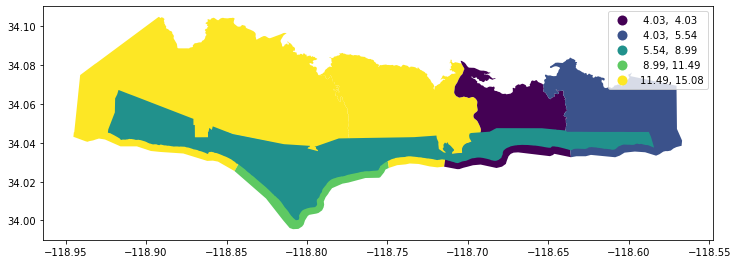

In [228]:
malibu.plot(figsize=(12,10),
                 column='Percent Hispanic or Latino',
                 legend=True, 
                 scheme='NaturalBreaks')
#Making our first map using choropleth maps

<AxesSubplot:ylabel='Frequency'>

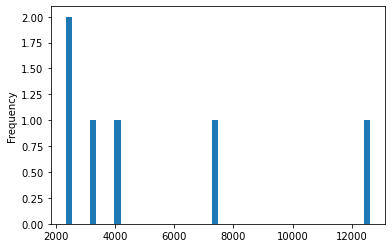

In [229]:
malibu['Total'].plot.hist(bins=50)
#plotting a histogram

Text(0.5, 1.0, 'Percent White Alone')

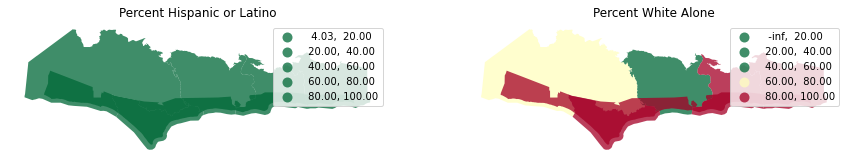

In [246]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# percent hispanic map on the left
malibu.plot(column='Percent Hispanic or Latino', 
            cmap='RdYlGn_r', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Hispanic or Latino")

# percent black map on the right
malibu.plot(column='Percent White Alone', 
            cmap='RdYlGn_r', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent White Alone")

#Making a map using subplots to create mulitple plots 

In [234]:
malibu_web_mercator = malibu.to_crs(epsg=3857)
## reproject to Web Mercator

In [235]:
import xyzservices.providers as xyz
#import xyzservices.providers as xyz

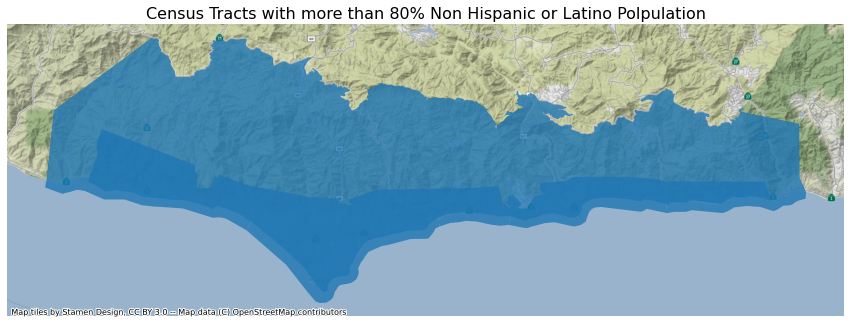

In [242]:
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
malibu_web_mercator[malibu_web_mercator['Percent Not Hispanic or Latino'] > 80].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with more than 80% Non Hispanic or Latino Polpulation',fontsize=16)

# add a basemap
ctx.add_basemap(ax)
# use subplots that make it easier to create multiple layered maps